In [83]:
# This NoteBook will perform best model selection for Random Forest Algorithm. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn # scatterplot
from IPython.display import display

In [4]:
# Read in the dataset
mob = pd.read_csv("Datasets/MobileData.csv")

In [5]:
# Glimpse into the object types
print("Object types: \n{}".format(mob.dtypes))

# This dataset is fully numeric. We have a mixture of float and integer dtypes

Object types: 
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [ ]:
# We now inspect whether there are any NA values

na_lst = mob.isna().sum()
null_lst = mob.isnull().sum()

In [ ]:
print("Number of NA values: \n{}".format(na_lst))

In [ ]:
print("Number of NULL values: \n{}".format(null_lst))

In [91]:
# Glimpse 
mob.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [113]:
# Target: price_range
mob.price_range.describe()
# Target variable with value of 0(low cost), 1(medium cost), 2(high cost), 3(very high cost)

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [ ]:
# Use: Functions that return minimum and maximum values inside a vector.
# Input: This function is intended to process a vector in this particular case. But it can also accept lists.
# Output: Maximum or maximum value for that vector, depending on the function.
def find_max(vec):
    vmax = 0
    for ele in vec:
        if ele > vmax:
            vmax = ele
    return vmax

def find_min(vec):
    vmin = 1998 # It can be improved with int_max but this function is specific for this dataset only.
    for ele in vec:
        if ele < vmin:
            vmin = ele
    return vmin

In [117]:
# Let's separate the data into the appropriate price ranges and inspect descriptive stats 

low_cost = mob[mob['price_range'] == 0]
medium_cost = mob[mob['price_range'] == 1]
high_cost = mob[mob['price_range'] == 2]
veryhi_cost = mob[mob['price_range'] == 3]

In [ ]:
def mean(data):
    means = []
    for variable in data.columns:
        total = sum(data[variable]) 
        
        mean = total/len(data)
        means.append(mean)
    
    return means

In [ ]:
row_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
col_names = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
m_lc = mean(low_cost)
m_mc = mean(medium_cost)
m_hc = mean(high_cost)
m_vhc = mean(veryhi_cost)

unified = [m_lc,m_mc, m_hc, m_vhc]

def filler(unified):
    means = []
    for i in unified:
        means.append(i)
    
    return means

means = filler(unified)
means_df = pd.DataFrame(data=means)
means_trans = means_df.transpose()

means_trans.columns = col_names
means_trans.index = row_names

means_trans['Max'] = means_trans.apply(lambda x: x.argmax(), axis=1)
print(means_trans)

                Low Cost  Medium Cost  High Cost  Very High Cost  Max
battery_power  1116.9020    1228.8680  1228.3200       1379.9840    3
blue              0.4860       0.4900     0.4860          0.5180    3
clock_speed       1.5502       1.4886     1.5298          1.5204    0
dual_sim          0.5000       0.5100     0.4980          0.5300    3
fc                4.0840       4.3400     4.4980          4.3160    2
four_g            0.5180       0.5240     0.4940          0.5500    3
int_memory       31.1740      32.1160    30.9200         33.9760    3
m_dep             0.4902       0.5240     0.4908          0.5020    1
mobile_wt       140.5520     140.5100   143.6140        136.3200    2
n_cores           4.6000       4.2980     4.6820          4.5020    2
pc                9.5740       9.9240    10.0180         10.1500    3
px_height       536.4080     666.8920   632.2840        744.8480    3
px_width       1150.2700    1251.9080  1234.0460       1369.8380    3
ram             785.

In [301]:
lc_best = means_trans.index[means_trans['Max'] == 0]
mc_best = means_trans.index[means_trans['Max'] == 1]
hc_best = means_trans.index[means_trans['Max'] == 2]
vhc_best = means_trans.index[means_trans['Max'] == 3]

lc_best = ['clock_speed', 'touch_screen']
mc_best = ['m_dep', 'talk_time']
hc_best = ['fc', 'mobile_wt', 'n_cores', 'three_g']
vhc_best = ['battery_power', 'blue', 'dual_sim', 'four_g', 'int_memory', 'pc',
            'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'wifi']

perf_summary = pd.DataFrame(data=[lc_best, mc_best, hc_best, vhc_best]).transpose()
perf_summary.columns = col_names
print(perf_summary)

#print("Highest mean specification per category: \n Low Cost: \n{} \n Medium Cost: \n{} \n High Cost: \n{} \n Very High Cost: \n{}".format(lc_best, mc_best, hc_best, vhc_best))

        Low Cost Medium Cost  High Cost Very High Cost
0    clock_speed       m_dep         fc  battery_power
1   touch_screen   talk_time  mobile_wt           blue
2           None        None    n_cores       dual_sim
3           None        None    three_g         four_g
4           None        None       None     int_memory
5           None        None       None             pc
6           None        None       None      px_height
7           None        None       None       px_width
8           None        None       None            ram
9           None        None       None           sc_h
10          None        None       None           sc_w
11          None        None       None           wifi


Text(0.5, 1.0, 'Mobile Price Range')

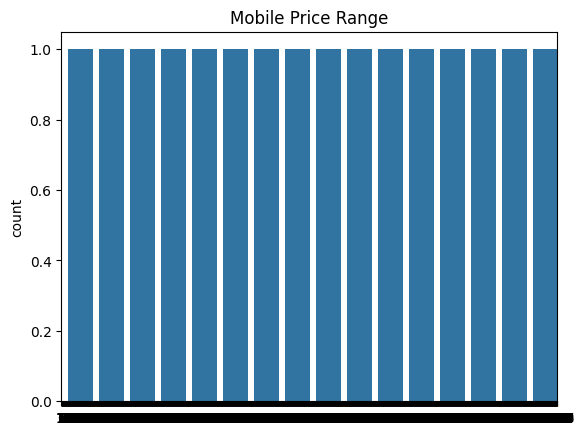

In [304]:
# Let's investigate the how many observations belong to each group
import seaborn as sns
mob['price_range'].value_counts()
sns.countplot(mob['price_range'])
plt.title('Mobile Price Range')

Text(0.5, 1.0, 'Number of cores')

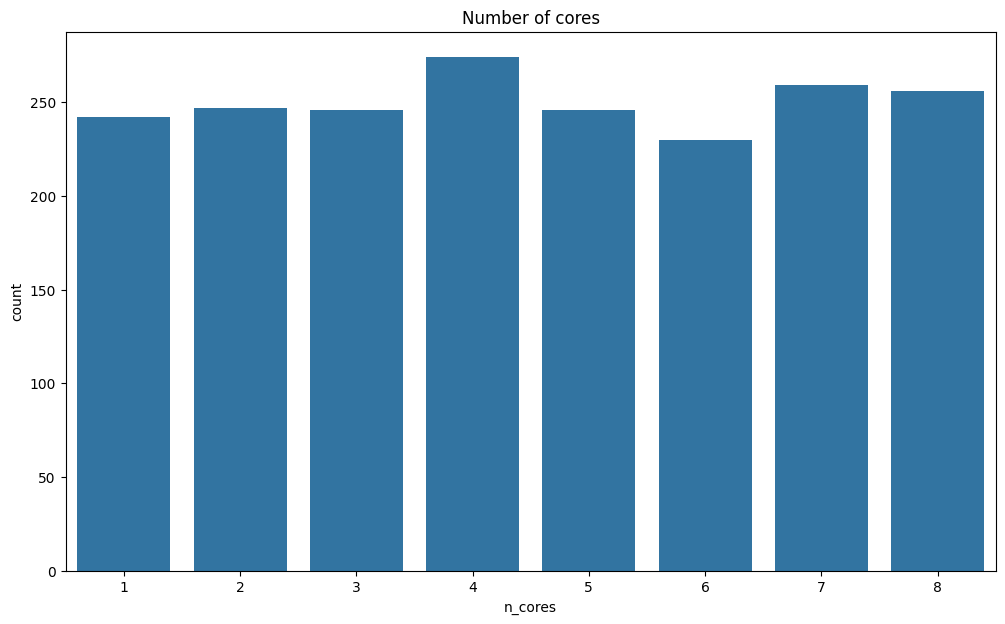

In [ ]:
# We can also inspect the other variable such as n_cores
plt.figure(figsize=(12,7))
sns.countplot(data=mob, x='n_cores')
plt.title("Number of cores")



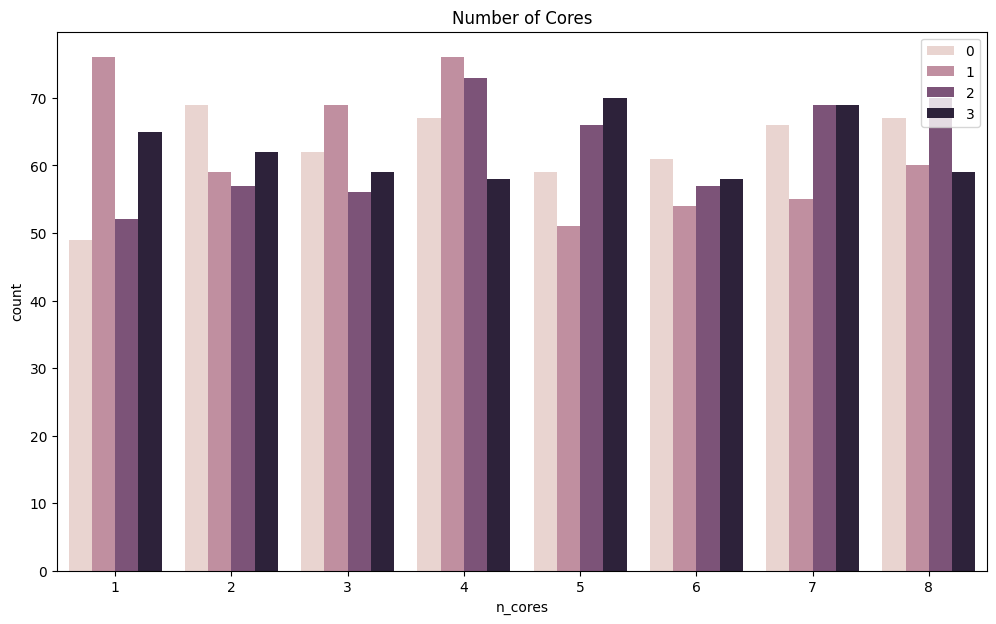

In [311]:
plt.figure(figsize=(12, 7))
sns.countplot(data=mob,x='n_cores',hue='price_range')
plt.title("Number of Cores")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Distribution of Mobile Weight')

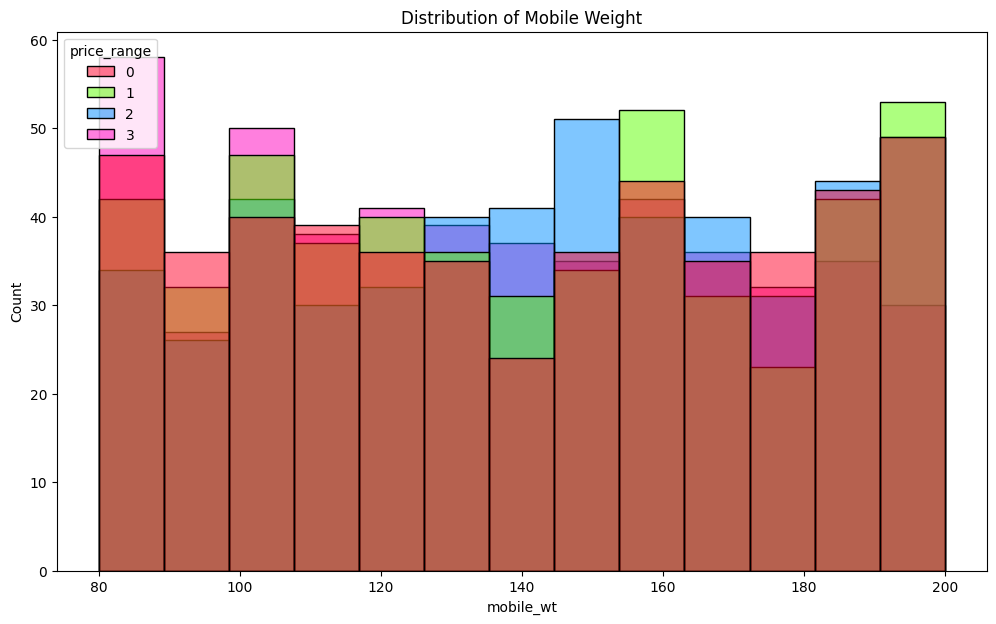

In [324]:
# Let's explore the distribution of features.
plt.figure(figsize=(12,7))
sns.histplot(data=mob, x="mobile_wt",palette = 'gist_rainbow', hue='price_range')
plt.title("Distribution of Mobile Weight")

Text(0.0, 1.0, 'Price Range')

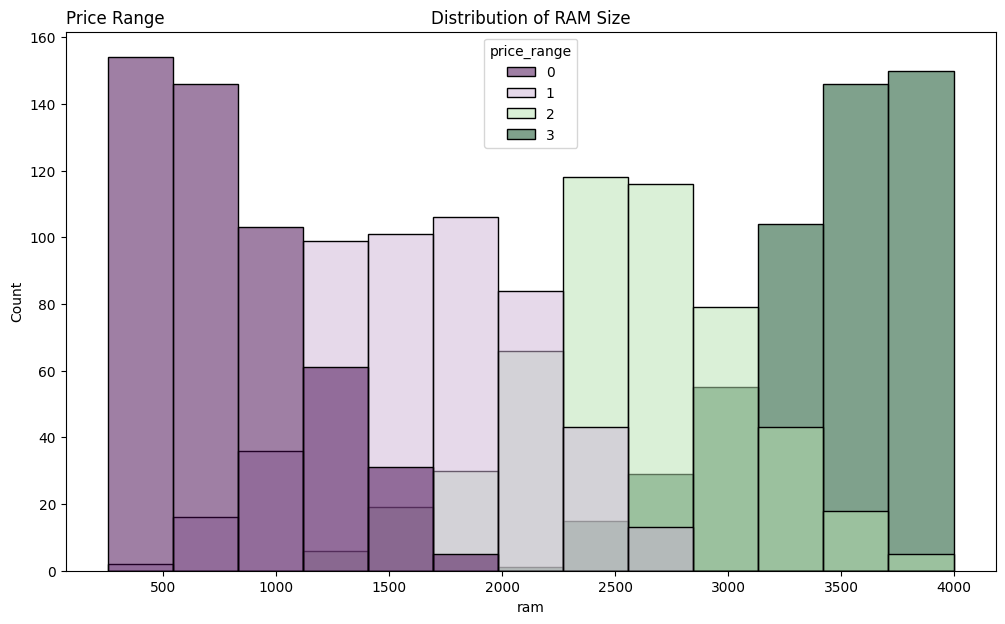

In [335]:
plt.figure(figsize=(12,7))
sns.histplot(data=mob, x="ram",palette="PRGn",hue='price_range')
plt.title("Distribution of RAM Size")
plt.title(loc='left',label="Price Range")

In [ ]:
# Let's separate categorical variables now.

# Function:
# Use: This function finds categorical variables in mobile dataset and stores them into a list.
# Input: This function requires a mobile dataset, or any other similar dataset.
# Output: The function returns a list of categorical variables (MAX = 1 (TRUE), MIN = 0 (FALSE)).

def find_categoricals(data):
    categoricals = []
    for variable in data.columns:
            if find_max(data[variable]) == 1 and min(data[variable]) == 0:
                categoricals.append(variable) 
    return categoricals

In [107]:
categoricals = find_categoricals(mob)
print(categoricals)

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


In [ ]:
# Now let's separate numerical and categorical variables

In [ ]:
# Numerical
numerical_variables = mob.drop(categoricals, axis=1)
# Check
print("Numerical variables: \n{}".format(numerical_variables.columns))
print("\nSize: \n{}".format(numerical_variables.columns.size))

Numerical variables: 
Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

Size: 
15


In [300]:
# Categorical
categorical_variables = mob.drop(numerical_variables, axis=1)
# Check
print("Numerical variables: \n{}".format(categorical_variables.columns))
print("\nSize: \n{}".format(categorical_variables.columns.size))

Numerical variables: 
Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')

Size: 
6


In [ ]:
# Let's create a scatterplot
from pandas.plotting import scatter_matrix

numerical_variables_df = pd.DataFrame(data=numerical_variables, columns = numerical_variables.columns)

grr = scatter_matrix(numerical_variables_df, c=y, figsize=(15,15), 
                     marker='o', hist_kwds={'bins' : 20}, 
                     s = 60, alpha = 0.8, cmap = mglearn.cm3)